In [233]:
import numpy as np
import seaborn as sns

# Definição de Variáveis para teste

In [234]:
# fração de x que vai ser usada como "derivada"
dx = 0.001
# dominio (x "amostrado" de -pi a +pi com step dx)
x = np.pi * np.arange(-1, +1, dx)
#
n = len(x)
nquart = int(n/4)

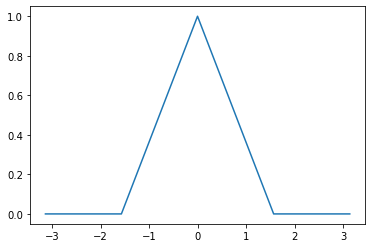

In [242]:
# Função a ser aproximada:
f = np.zeros_like(x)
f[1*nquart:2*nquart] = 4*np.arange(1, nquart+1)/2000
f[2*nquart:3*nquart] = -4*np.arange(1, nquart+1)/2000 +1
sns.lineplot(x, f)

# Implementação

In [239]:
def fourier_series(x: np.array, MAX_ITER=100) -> np.array:
	def compute_Ak(k: int) -> float:
		return np.dot(f, np.cos(np.pi*(k)*x/max_x)*dx)

	def compute_Bk(k: int) -> float:
		return np.dot(f, np.sin(np.pi*(k)*x/max_x)*dx)

	max_x = max(x)

	sum_ = np.zeros_like(x)
	sum_ += compute_Ak(0)/2

	for k in range(1, MAX_ITER):
		sum_  += compute_Ak(k)*np.cos(np.pi*(k)*x/max_x) + compute_Bk(k)*np.sin(np.pi*(k)*x/max_x)
		yield sum_

In [275]:
class FourierSeries():
	x: np.array
	A: np.array
	B: np.array
 
	def __init__(self, x: np.array) -> None:
		self.x = x
		self.A = np.zeros_like(x)
		self.B = np.zeros_like(x)

	def compute(self, MAX_ITER=100):
		def compute_Ak(k: int) -> None:
			self.A[k] = np.dot(f, np.cos(np.pi*(k)*x/max(x))*dx)

		def compute_Bk(k: int) -> None:
			self.B[k] = np.dot(f, np.sin(np.pi*(k)*x/max(x))*dx)

		sum_ = np.zeros_like(x)
		compute_Ak(0)
		sum_ += self.A[0]/2

		for k in range(1, MAX_ITER):
			compute_Ak(k)
			compute_Bk(k)
			sum_  += self.A[k]*np.cos(np.pi*(k)*x/max(x)) + self.B[k]*np.sin(np.pi*(k)*x/max(x))
			yield sum_

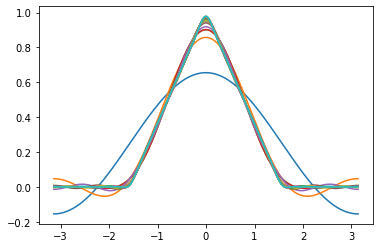

In [334]:
# 20 iteraçõesjá parece bom:
series_ = FourierSeries(x)
computed_series = series_.compute()
for _ in range (20):
    sns.lineplot(x, next(computed_series))

# Analisando a implementação

In [338]:
# 200 iterações é melhor nesse caso:
series_ = FourierSeries(x)
computed_series = series_.compute(MAX_ITER=201)

error_ = np.zeros_like(x)
for i in range (200):
	pred_f = next(computed_series)
	error_[i] = ((f-pred_f)**2).mean()

In [339]:
import pandas as pd
# valor dos coeficientes de B é sempre bem menor que os de A. 
# inclusive: em teoria, os coeficientes de B deveriam ser nulos pois f é par
pd.DataFrame({"A": list(series_.A), "B":list(series_.B)})

,A,B
0,5.000000e-01,0.000000e+00
1,4.051089e-01,-1.273965e-03
2,2.022335e-01,-1.271959e-03
3,4.472797e-02,-4.219856e-04
4,4.999654e-07,-6.289371e-09
...,...,...
1995,0.000000e+00,0.000000e+00
1996,0.000000e+00,0.000000e+00
1997,0.000000e+00,0.000000e+00
1998,0.000000e+00,0.000000e+00


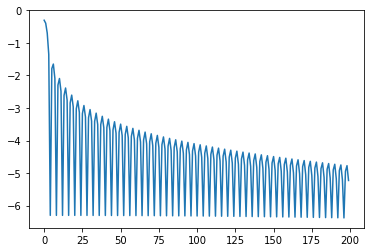

In [340]:
# valor dos coeficientes de A: 
sns.lineplot(range(200), np.log10(series_.A[:200]))

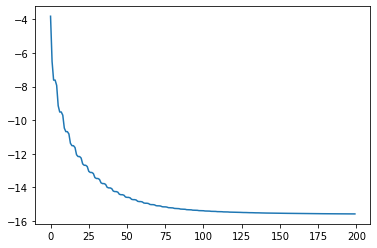

In [341]:
# mean squared error: 
sns.lineplot(range(200), np.log(error_[:200])) 